<head>
    <style>
        h1{
            color: red ;
        }
    </style>
</head>
<h1> Introduction : </h1>
<p>Prendre en main le sujet de TP et voir comment générer des chiffres entiers aléatoires avec R</p>

<h1> Sujet du TP </h1>
<p>Un enfant collectionne des images de son équipe de football
préférée, images qu’il trouve dans des boîtes de céréales. Il y a
11 images différentes à gagner.</p>

In [1]:
# Faire un premier tirage 
# Pour simplifier on ne donne pas de nom aux cartes mais on leur donne un numéro entre 1 et 11
tirage = sample(x=1:11,size=20,replace=T)
print(tirage)

 [1]  1  1  6  7  4  2  4  5  4  2  5  5  7  1 11  8  2  1  2  6


In [2]:
mode(tirage)

[1] "numeric"

# Question 1 :
<p> Combien faut-il acheter de boîtes de céréales en moyenne
pour avoir la collection complète des joueurs ? (on, suppose bien
entendu que l’on a la même probabilité d’obtenir chacune des
images dans chaque paquet de céréales</p>

<p> <a href="https://www.ilemaths.net/sujet-le-collectionneur-469931.html">Lien</a> pour aider à la démonstration de la formule a utilisé. </p>

In [3]:
moyenneObtenirTouteLesCartes = function(n){
    # Fonction qui calcule combien il faut acheter de boîtes en moyenne pour obtenir toutes les cartes.
    # n représente le nombre de cartes qu'il y a obtenir
    # k représente le nombre de cartes que l'on possède 
    k = 1
    somme1k = 0
    moyenne = 0 # Nombre de boite que l'on doit acheter en moyenne
    while (k<=n){
        somme1k = somme1k + (1/k)
        k = k+1
    }
    moyenne = n*somme1k
    # Une fois que l'on possède le nombre moyen de boîtes qu'il faut acheter il faut arrondir par excès.
    # Car la moyenne et un nombre réel et que le nombre de boîtes est entier.
    moyenne = ceiling(moyenne)
    # Renvoie le nombre de boîtes qu'il faut acheter en moyenne
    return(moyenne)
}
moyenneObtenirTouteLesCartes(11)

[1] 34

# Question 2 :
<p> Développer une fonction qui réalise N tests.</p>

In [4]:
# Définir le nombre de tirages que l'on souhaite réaliser
nombreDeTirage = 40

In [5]:
NTest <- function(N){
    # Fonction qui réalise les N tirages aléatoires de carte 
    tirage = sample(x=1:11,size=N,replace = TRUE)
    # On renvoie les N tirages aléatoires
    return(tirage)
}

In [6]:
# On convertit les N tirages aléatoires en numeric
experience = as.numeric(NTest(nombreDeTirage))
print(experience)

 [1]  3  2  7  7  5  9  2  2  2  6 11  4  9  7  1 10  9 10  2  6 11  3  1  3  1
[26] 10  8  3  8 10 10  1  9  6  9  7  9  2  9  6


<h1> Question 3 : </h1>
<p> Réaliser un frame composé de la date de test et du nombre
de tirage.</p>

In [7]:
# On récupère la date 
Date = Sys.time()
print(Date)

[1] "2021-09-14 10:55:33 CEST"


In [8]:
# On crée le frame avec la date et le nombre de tirages
(frame = data.frame(Date,nombreDeTirage))

Date,nombreDeTirage
<dttm>,<dbl>
2021-09-14 10:55:33,40


In [9]:
dataframeDateEtTest = function(N){
    i=1
    date = rep(Sys.time(),N)
    tirages = rep(0,N)
    while (i<=N){
        tirages[i]=sample(x=1:11,size=1)
        date[i]=Sys.time()
        i=i+1
    }
    (df<- data.frame(date,tirages))
    return(df)
}
frame1 = dataframeDateEtTest(30)

# Question 4 :
<p>Afficher la structure du frame.</p>

In [10]:
print(frame)

                 Date nombreDeTirage
1 2021-09-14 10:55:33             40


In [11]:
print(frame1)

                  date tirages
1  2021-09-14 10:55:33       1
2  2021-09-14 10:55:33       6
3  2021-09-14 10:55:33       9
4  2021-09-14 10:55:33       9
5  2021-09-14 10:55:33       1
6  2021-09-14 10:55:33       6
7  2021-09-14 10:55:33       6
8  2021-09-14 10:55:33      10
9  2021-09-14 10:55:33       8
10 2021-09-14 10:55:33       3
11 2021-09-14 10:55:33      10
12 2021-09-14 10:55:33       2
13 2021-09-14 10:55:33       4
14 2021-09-14 10:55:33      11
15 2021-09-14 10:55:33       7
16 2021-09-14 10:55:33       4
17 2021-09-14 10:55:33      10
18 2021-09-14 10:55:33       7
19 2021-09-14 10:55:33       9
20 2021-09-14 10:55:33      10
21 2021-09-14 10:55:33       3
22 2021-09-14 10:55:33       2
23 2021-09-14 10:55:33      10
24 2021-09-14 10:55:33      11
25 2021-09-14 10:55:33       3
26 2021-09-14 10:55:33       1
27 2021-09-14 10:55:33       7
28 2021-09-14 10:55:33       6
29 2021-09-14 10:55:33       6
30 2021-09-14 10:55:33      10


# Question 5 :
<p> Afficher la courbe des tirages.</p>

In [12]:
compterValeur = function(tirage){
    # Cette fonction permet de compter combien de fois nous avons chaque carte
    # Utile pour afficher le diagramme en baton
    i=1
    x = rep(0,11)
    while (i<length(tirage)){
        x[tirage[i]] = x[tirage[i]]+1
        i = i+1
    }
    # Renvoyer le vecteur x qui a compté combien de fois nous avons trouvé chaque carte
    return(x)
}

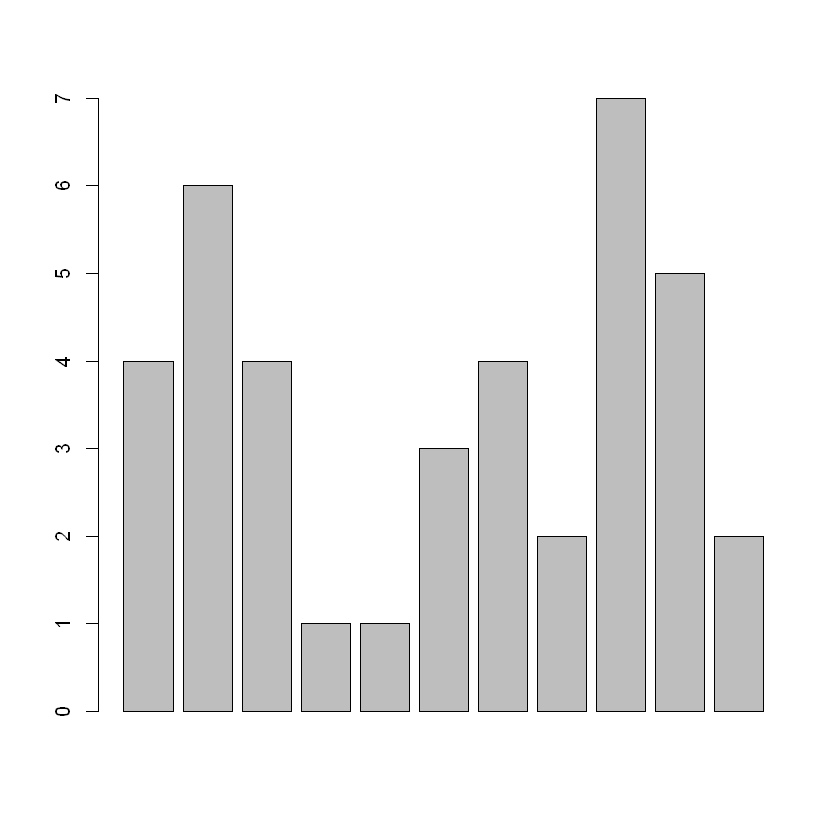

In [13]:
# Afficher le diagramme en bâton plus pratique pour voir combien de fois nous avons chaque carte
barplot(compterValeur(experience))

# Question 6 :
<p>Exporter le frame dans un fichier excel.<p>

In [14]:
# Installer le package nécessaire pour pouvoir travailler avec les fichiers excels
install.packages("writexl")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'writexl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\RtmpwhC4O1\downloaded_packages


In [15]:
# Sauvegarder le frame dans un fichier excel nommé TP1.xlsx
library("writexl")
write_xlsx(frame1, "TP1.xlsx")